In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from keras.layers import Dense
import pickle
import json
%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/TugasJST/MLP/Regresi/Linier-Regression/data.csv') # Importing the dataset
df.sample(5) #previewing dataset randomly

Make         Model  Year  ... city mpg  Popularity    MSRP
9016            GMC  Savana Cargo  2016  ...       11         549   30595
10111        Suzuki         Swift  2000  ...       31         481    2000
11322        Suzuki        Verona  2004  ...       17         481   20199
11147  Aston Martin    V8 Vantage  2014  ...       13         259  131200
3363          Mazda          CX-5  2015  ...       26         586   22945

[5 rows x 16 columns]

In [11]:
print(df.shape) # view the dataset shape
print(df['Make'].value_counts()) # viewing Car companies with their cars number

(11914, 16)
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             

In [12]:
new_df = df[df['Make']=='Volkswagen'] # in this new dataset we only take 'Volkswagen' Cars
print(new_df.shape) # Viewing the new dataset shape
print(new_df.isnull().sum()) # Is there any Null or Empty cell presents
new_df = new_df.dropna() # Deleting the rows which have Empty cells
print(new_df.shape) # After deletion Vewing the shape
print(new_df.isnull().sum()) #Is there any Null or Empty cell presents
new_df.sample(2) # Checking the random dataset sample

(809, 16)
Make                   0
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP              0
Engine Cylinders       4
Transmission Type      0
Driven_Wheels          0
Number of Doors        0
Market Category      224
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64
(581, 16)
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


Make       Model  Year  ... city mpg  Popularity   MSRP
5364  Volkswagen    Golf GTI  2015  ...       25         873  29280
7200  Volkswagen  New Beetle  2008  ...       20         873  20990

[2 rows x 16 columns]

In [13]:
new_df = new_df[['Engine HP','MSRP']] # We only take the 'Engine HP' and 'MSRP' columns
new_df.sample(5) # Checking the random dataset sample

Engine HP   MSRP
6016      200.0  23945
2412      200.0  34475
1813      210.0  33795
5635      200.0  27975
1794      210.0  34895

In [14]:
X = np.array(new_df[['Engine HP']]) # Storing into X the 'Engine HP' as np.array
y = np.array(new_df[['MSRP']]) # Storing into y the 'MSRP' as np.array
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y

(581, 1)
(581, 1)


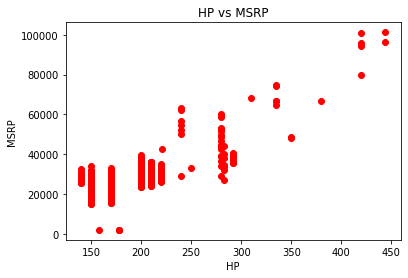

In [15]:
plt.scatter(X,y,color="red") # Plot a graph X vs y
plt.title('HP vs MSRP')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15) # Spliting into train & test dataset
regressor = LinearRegression() # Creating a regressior
regressor.fit(X_train,y_train) # Fiting the dataset into the model
filename = '/content/drive/MyDrive/TugasJST/MLP/Regresi/Linier-Regression/predictcarvalue.h5'
pickle.dump(regressor, open(filename, 'wb'))

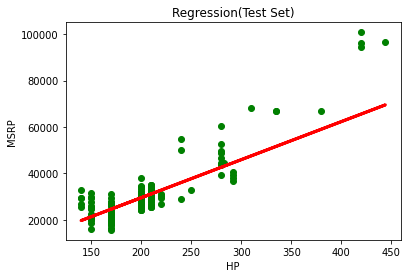

In [18]:
plt.scatter(X_test,y_test,color="green") # Plot a graph with X_test vs y_test
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) # Regressior line showing
plt.title('Regression(Test Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

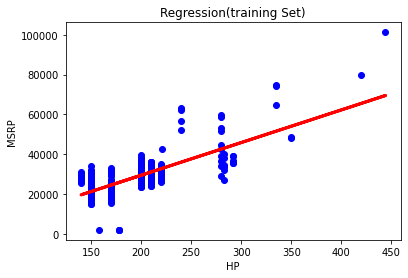

In [19]:
plt.scatter(X_train,y_train,color="blue")  # Plot a graph with X_train vs y_train
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) # Regressior line showing
plt.title('Regression(training Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

In [20]:
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) # Priniting R2 Score
print('Mean squared Error :',mean_squared_error(y_test,y_pred)) # Priniting the mean error

R2 score: 0.73
Mean squared Error : 55796476.51179164


In [21]:
def car_price(hp): # A function to predict the price according to Horsepower
    result = regressor.predict(np.array(hp).reshape(1, -1))
    return(result[0,0])

car_hp = int(input('Enter Volkswagen cars Horse Power : '))
print('This Volkswagen Prce will be : ',int(car_price(car_hp))*69,'₹')

Enter Volkswagen cars Horse Power : 400
This Volkswagen Prce will be :  4297941 ₹
